<h1> Open Street Maps Project of Reno NV</h1>

<p> please click the link, if you would like to see the area audited </p> 

<https://www.openstreetmap.org/relation/170120/>

In [30]:
import os
from xml.etree import cElementTree as ET
from collections import defaultdict
import pprint
import re
# Import BeautifulSoup
from bs4 import BeautifulSoup as bs


data = []
# Read the XML file
with open("sample2.osm", "r", encoding="utf8") as file:
    # Read each line in the file, readlines() returns a list of lines
    data = file.readlines()
    # Combine the lines in the list into a string
    data = "".join(data)
    soup = bs(data, "lxml")




file_name = 'sample2.osm'

doc_path = os.path.join(file_name)
file_path = os.path.abspath(os.path.join(file_name))
osm_file = open("sample2.osm", encoding="utf8")
street_type_re = re.compile(r'\S+\.?$', re.IGNORECASE)
street_typesw = defaultdict(set)
street_types = defaultdict(int)
size = os.path.getsize(file_path)
print('Size of my osm sample file is', size, 'bytes')



def basic_audit_street_type(street_types, street_name):
    m = street_type_re.search(street_name)
    if m:
        street_type = m.group()

        street_types[street_type] += 1


#def audit_street_type(street_types, street_name):
#    m = street_type_re.search(street_name)
#    if m:
#        street_type = m.group()
#        if street_type not in expected:
#            street_types[street_type].add(street_name)
# Looks at the expected list, and returns a dictionary of names that does not match the expected list appove. 

def print_sorted_dict(d):
    keys = d.keys()
    keys = sorted(keys, key=lambda s: s.lower())
    for k in keys:
        v = d[k]
        print("%s: %d" % (k, v)) 
def is_street_name(elem):
    return (elem.tag == "tag") and (elem.attrib['k'] == "addr:street")




Size of my osm sample file is 25981452 bytes


<p> For my Open Street Map project I audited the city of Reno, NV. I choose Reno becuase I have lived in this area for 
    about 20 years now, so I felt I would be more prepared to audit a city that I'm familar with.

<h3> Issues during the audit</h3>

After looking over the data I found a few issues, that are worth noting:</br>
    1. Street names had different notations: for example, Keystone Ave. vs Highland Avenue.</br>
    2. Zip codes found in the audit belonged to Sparks, NV.</br>
            -89431, 89432, 89434, 89435, 89436 all belong to the city of Sparks, NV.</br>
            

<h3> Digging into the Data</h3>

In [7]:
def basic_audit_street_type(street_types, street_name):
    m = street_type_re.search(street_name)
    if m:
        street_type = m.group()

        street_types[street_type] += 1
# This function will show us what different names streets in Reno have been given.

def audit():
    for event, elem in ET.iterparse(osm_file):
        if is_street_name(elem):
            basic_audit_street_type(street_types, elem.attrib['v'])    
    print_sorted_dict(street_types)

audit()

40: 1
Arlington: 1
Ave: 2
Avenue: 28
Blvd: 1
Boulevard: 42
Circle: 22
Court: 47
Dr: 1
Drive: 107
Highway: 1
Lane: 31
Loop: 5
Parkway: 14
Pl.: 1
Place: 1
Road: 28
Row: 1
s: 1
Square: 1
St: 1
Street: 138
traffic_signals: 1
Trail: 18
Way: 26


<p> From the above data, I can see that the users who added the map data to OpenStreetMaps didn't always use</br>
the same naming convention as other users, also there is a traffic_signal tag that shouldn't be a street name.</p>

<p>Next lets look at our postal codes for Reno NV. </p>

In [8]:
file_name = 'sample2.osm'
def find_pc_k(elem):
    return (elem.attrib['k'] =='addr:postcode')
       # will show all postal codes in the data set.

def find_tags():
    for event, elem in ET.iterparse(file_name, events =("start",)):
        if elem.tag =='node':
            for tag in elem.iter('tag'):
                  if find_pc_k(tag):
                    print(tag.attrib['k'], tag.attrib['v'])
                    #return tag.attrib['k'], tag.attrib['v']

                
if __name__ == '__main__':
    find_tags()
    
;

addr:postcode 89431
addr:postcode 89502
addr:postcode 89512
addr:postcode 89502
addr:postcode 89502
addr:postcode 89512
addr:postcode 89503
addr:postcode 89521
addr:postcode 89503
addr:postcode 89501
addr:postcode 89509
addr:postcode 89501
addr:postcode 89503
addr:postcode 89509
addr:postcode 89509
addr:postcode 89503
addr:postcode 89501
addr:postcode 89511
addr:postcode 89512
addr:postcode 89501
addr:postcode 89503
addr:postcode 89501
addr:postcode 89436
addr:postcode 89501
addr:postcode 89501
addr:postcode 89501
addr:postcode 89502
addr:postcode 89503
addr:postcode 89521
addr:postcode 89502
addr:postcode 89502
addr:postcode 89502
addr:postcode 89506
addr:postcode 89503
addr:postcode 89503
addr:postcode 89501
addr:postcode 89503
addr:postcode 89501
addr:postcode 89505
addr:postcode 89501
addr:postcode 89501
addr:postcode 89431
addr:postcode 89501
addr:postcode 89436
addr:postcode 89436
addr:postcode 89436
addr:postcode 89434
addr:postcode 89436
addr:postcode 89436
addr:postcode 89434


''

<p> From the data above, we can see that the zip codes for Reno, are all evenly named, except entry 89502-1633.</br>
However, there are zip codes that are not from the city of Reno.</p>

<h3> Lets clean up this data</h3>


In [9]:
zipcode = [] #empty array to store all zip_codes
post_C = soup.find_all("tag", {"k": "addr:postcode"})

for code in post_C:
    zipcode.append(code)
#using beautiful soup to find tags with incorrect zipcodes

In [32]:
print(zipcode)

[<tag k="addr:postcode" v="89431"></tag>, <tag k="addr:postcode" v="89502"></tag>, <tag k="addr:postcode" v="89512"></tag>, <tag k="addr:postcode" v="89502"></tag>, <tag k="addr:postcode" v="89502"></tag>, <tag k="addr:postcode" v="89512"></tag>, <tag k="addr:postcode" v="89503"></tag>, <tag k="addr:postcode" v="89521"></tag>, <tag k="addr:postcode" v="89503"></tag>, <tag k="addr:postcode" v="89501"></tag>, <tag k="addr:postcode" v="89509"></tag>, <tag k="addr:postcode" v="89501"></tag>, <tag k="addr:postcode" v="89503"></tag>, <tag k="addr:postcode" v="89509"></tag>, <tag k="addr:postcode" v="89509"></tag>, <tag k="addr:postcode" v="89503"></tag>, <tag k="addr:postcode" v="89501"></tag>, <tag k="addr:postcode" v="89511"></tag>, <tag k="addr:postcode" v="89512"></tag>, <tag k="addr:postcode" v="89501"></tag>, <tag k="addr:postcode" v="89503"></tag>, <tag k="addr:postcode" v="89501"></tag>, <tag k="addr:postcode" v="89436"></tag>, <tag k="addr:postcode" v="89501"></tag>, <tag k="addr:po

In [33]:
#removing all unwanted zipcodes from our data:
unwanted_codes = soup.find_all("tag", {"k": "addr:postcode"} and {"v": "89434"})
for x in unwanted_codes:
    zipcode.remove(x)

    next_code = soup.find_all("tag", {"k": "addr:postcode"} and {"v":"89431"})   
for a in next_code:
    zipcode.remove(a)


     

In [34]:
bad_zip = soup.find_all("tag", {"k": "addr:postcode"}and {"v":"89432"})
for b in bad_zip:
    zipcode.remove(b)

In [36]:
sp_zip = soup.find_all("tag", {"k": "addr:postcode"}and {"v":"89435"})
for c in sp_zip:
    zipcode.remove(c)

In [37]:
sp_zip2 = soup.find_all("tag", {"k": "addr:postcode"}and {"v":"89436"})
for d in sp_zip2:
    zipcode.remove(d)

In [39]:
unknown_zip = soup.find_all("tag", {"k": "addr:postcode"}and {"v":"96118"})
for u in unknown_zip:
    zipcode.remove(u)

In [10]:
for x in zipcode:
    print(x) # Zipcode now only holds the correct zip codes 

<tag k="addr:postcode" v="89431"></tag>
<tag k="addr:postcode" v="89502"></tag>
<tag k="addr:postcode" v="89512"></tag>
<tag k="addr:postcode" v="89502"></tag>
<tag k="addr:postcode" v="89502"></tag>
<tag k="addr:postcode" v="89512"></tag>
<tag k="addr:postcode" v="89503"></tag>
<tag k="addr:postcode" v="89521"></tag>
<tag k="addr:postcode" v="89503"></tag>
<tag k="addr:postcode" v="89501"></tag>
<tag k="addr:postcode" v="89509"></tag>
<tag k="addr:postcode" v="89501"></tag>
<tag k="addr:postcode" v="89503"></tag>
<tag k="addr:postcode" v="89509"></tag>
<tag k="addr:postcode" v="89509"></tag>
<tag k="addr:postcode" v="89503"></tag>
<tag k="addr:postcode" v="89501"></tag>
<tag k="addr:postcode" v="89511"></tag>
<tag k="addr:postcode" v="89512"></tag>
<tag k="addr:postcode" v="89501"></tag>
<tag k="addr:postcode" v="89503"></tag>
<tag k="addr:postcode" v="89501"></tag>
<tag k="addr:postcode" v="89436"></tag>
<tag k="addr:postcode" v="89501"></tag>
<tag k="addr:postcode" v="89501"></tag>


<h4> Next we will import our data into csv files</h4>

In [13]:
import csv
import codecs
import pprint
import re
import xml.etree.ElementTree as ET
from bs4 import BeautifulSoup as soup 
import cerberus



OSM_PATH = "sample2.osm"

NODES_PATH = "nodes.csv"
NODE_TAGS_PATH = "nodes_tags.csv"
WAYS_PATH = "ways.csv"
WAY_NODES_PATH = "ways_nodes.csv"
WAY_TAGS_PATH = "ways_tags.csv"

LOWER_COLON = re.compile(r'^([a-z]|_)+:([a-z]|_)+')
PROBLEMCHARS = re.compile(r'[=\+/&<>;\'"\?%#$@\,\. \t\r\n]')

SCHEMA = {
    'node': {
        'type': 'dict',
        'schema': {
            'id': {'required': True, 'type': 'integer', 'coerce': int},
            'lat': {'required': True, 'type': 'float', 'coerce': float},
            'lon': {'required': True, 'type': 'float', 'coerce': float},
            'user': {'required': True, 'type': 'string'},
            'uid': {'required': True, 'type': 'integer', 'coerce': int},
            'version': {'required': True, 'type': 'string'},
            'changeset': {'required': True, 'type': 'integer', 'coerce': int},
            'timestamp': {'required': True, 'type': 'string'}
        }
    },
    'node_tags': {
        'type': 'list',
        'schema': {
            'type': 'dict',
            'schema': {
                'id': {'required': True, 'type': 'integer', 'coerce': int},
                'key': {'required': True, 'type': 'string'},
                'value': {'required': True, 'type': 'string'},
                'type': {'required': True, 'type': 'string'}
            }
        }
    },
    'way': {
        'type': 'dict',
        'schema': {
            'id': {'required': True, 'type': 'integer', 'coerce': int},
            'user': {'required': True, 'type': 'string'},
            'uid': {'required': True, 'type': 'integer', 'coerce': int},
            'version': {'required': True, 'type': 'string'},
            'changeset': {'required': True, 'type': 'integer', 'coerce': int},
            'timestamp': {'required': True, 'type': 'string'}
        }
    },
    'way_nodes': {
        'type': 'list',
        'schema': {
            'type': 'dict',
            'schema': {
                'id': {'required': True, 'type': 'integer', 'coerce': int},
                'node_id': {'required': True, 'type': 'integer', 'coerce': int},
                'position': {'required': True, 'type': 'integer', 'coerce': int}
            }
        }
    },
    'way_tags': {
        'type': 'list',
        'schema': {
            'type': 'dict',
            'schema': {
                'id': {'required': True, 'type': 'integer', 'coerce': int},
                'key': {'required': True, 'type': 'string'},
                'value': {'required': True, 'type': 'string'},
                'type': {'required': True, 'type': 'string'}
            }
        }
    }
}


# Make sure the fields order in the csvs matches the column order in the sql table schema
NODE_FIELDS = ['id', 'lat', 'lon', 'user', 'uid', 'version', 'changeset', 'timestamp']
NODE_TAGS_FIELDS = ['id', 'key', 'value', 'type']
WAY_FIELDS = ['id', 'user', 'uid', 'version', 'changeset', 'timestamp']
WAY_TAGS_FIELDS = ['id', 'key', 'value', 'type']


WAY_NODES_FIELDS = ['id', 'node_id', 'position']


def shape_element(element, node_attr_fields=NODE_FIELDS, way_attr_fields=WAY_FIELDS,
                  problem_chars=PROBLEMCHARS, default_tag_type='regular'):
    """Clean and shape node or way XML element to Python dict"""
 
    
    
    node_attribs = {}
    node_tags ={}
    way_attribs = {}
    way_tags ={}
    way_nodes = []
    tags = []  # Handle secondary tags the same way for both node and way elements
    
    if element.tag =='node':
        #for x not in node_attr_fileds:
        for x in NODE_TAGS_FIELDS:
            #soup.find_all("tag", {'id'})
            node_tags[x] = element.attrib[x] if hasattr(element.attrib, x) else ''
    
        for f in node_attr_fields:
            node_attribs[f] = element.attrib[f]
            
        for node in element:
            node_tags['id'] = element.attrib['id']
            node_tags['key'] = node.attrib['k'] 
            node_tags['value'] = node.attrib['v']
            node_tags['type'] = 'regular'
            tags.append(node_tags)
        
        for reno in zipcode:
            if reno in zipcode:
                tags.append(node_tags) #Using zipcode so that we are only using correct zip codes from cleaned data.
           
    elif element.tag =='way':
       
             
        for a in WAY_TAGS_FIELDS:
            way_tags[a] = element.attrib[a] if hasattr(element.attrib, a) else ''
            
        for w in way_attr_fields:
            way_attribs[w] = element.attrib[w]
            #print(list(way_attribs.items())[:4])
            #print(way_attribs[w])
            #way_nodes.append({way_attribs['id'], way_attribs['ref'], i})
            #i = i+1
       
        
        for node in element:
            if node.tag == 'tag':
                way_tags['id'] = element.attrib['id']
                way_tags['key'] = node.attrib['k'] 
                way_tags['value'] = node.attrib['v']
                way_tags['type'] = 'regular'
                tags.append(way_tags)
        
    if element.tag == 'node':
        return {'node': node_attribs, 'node_tags': node_tags}
    elif element.tag == 'way':
        return{'way': way_attribs, 'way_nodes': way_nodes, 'way_tags': way_tags}
    
    print(way_attribs[w])
# ================================================== #
#               Helper Functions                     #
# ================================================== #
def get_element(osm_file, tags=('node', 'way', 'relation')):
    """Yield element if it is the right type of tag"""

    context = ET.iterparse(osm_file, events=('start', 'end'))
    _, root = next(context)
    for event, elem in context:
        if event == 'end' and elem.tag in tags:
            yield elem
            root.clear()


def validate_element(element, validator, schema=SCHEMA):
    """Raise ValidationError if element does not match schema"""
    if validator.validate(element, schema) is not True:
        field, errors = next(iter(validator.errors.items()))
        message_string = "\nElement of type '{0}' has the following errors:\n{1}"
        error_string = pprint.pformat(errors)
        
        raise Exception(message_string.format(field, error_string))


class UnicodeDictWriter(csv.DictWriter, object):
    """Extend csv.DictWriter to handle Unicode input"""

    def writerow(self, row):
            #print("ROW:", row)
            super(UnicodeDictWriter, self).writerow({
            k: v for k, v in row.items()})
            #k: (v.encode('utf-8') if not isinstance(v, bytes) else v) for k, v in row.items()})  

    def writerows(self, rows):
        for row in rows:
            self.writerow(row)


# ================================================== #
#               Main Function                        #
# ================================================== #
def process_map(file_in, validate):
    """Iteratively process each XML element and write to csv(s)"""

    with codecs.open(NODES_PATH, 'w',"utf-8" ) as nodes_file, \
         codecs.open(NODE_TAGS_PATH, 'w',"utf-8") as nodes_tags_file, \
         codecs.open(WAYS_PATH, 'w',"utf-8") as ways_file, \
         codecs.open(WAY_NODES_PATH, 'w',"utf-8") as way_nodes_file, \
         codecs.open(WAY_TAGS_PATH, 'w',"utf-8") as way_tags_file:

        nodes_writer = UnicodeDictWriter(nodes_file, NODE_FIELDS)
        node_tags_writer = UnicodeDictWriter(nodes_tags_file, NODE_TAGS_FIELDS)
        ways_writer = UnicodeDictWriter(ways_file, WAY_FIELDS)
        way_nodes_writer = UnicodeDictWriter(way_nodes_file, WAY_NODES_FIELDS)
        way_tags_writer = UnicodeDictWriter(way_tags_file, WAY_TAGS_FIELDS)

        nodes_writer.writeheader()
        node_tags_writer.writeheader()
        ways_writer.writeheader()
        way_nodes_writer.writeheader()
        way_tags_writer.writeheader()

        validator = cerberus.Validator()

        for element in get_element(file_in, tags=('node', 'way')):
            el = shape_element(element)
           # print("ELEMENT:", el.items())
            
            if el:
                if validate is True:
                    validate_element(el, validator)

                if element.tag == 'node':
                  #  print("ELEMENT:", el.items())
                    
                    nodes_writer.writerow(el['node'])
                    node_tags_writer.writerow(el['node_tags'])
                elif element.tag == 'way':
                    ways_writer.writerow(el['way'])
                    way_nodes_writer.writerows(el['way_nodes'])
                    way_tags_writer.writerow(el['way_tags'])

if __name__ == '__main__':
    # Note: Validation is ~ 10X slower. For the project consider using a small
    # sample of the map when validating.
    process_map(OSM_PATH, validate=False)

<p> Once I was able to get the data to a csv file I was able to load it into a sqlite database. Below are the tables in the DB </p>

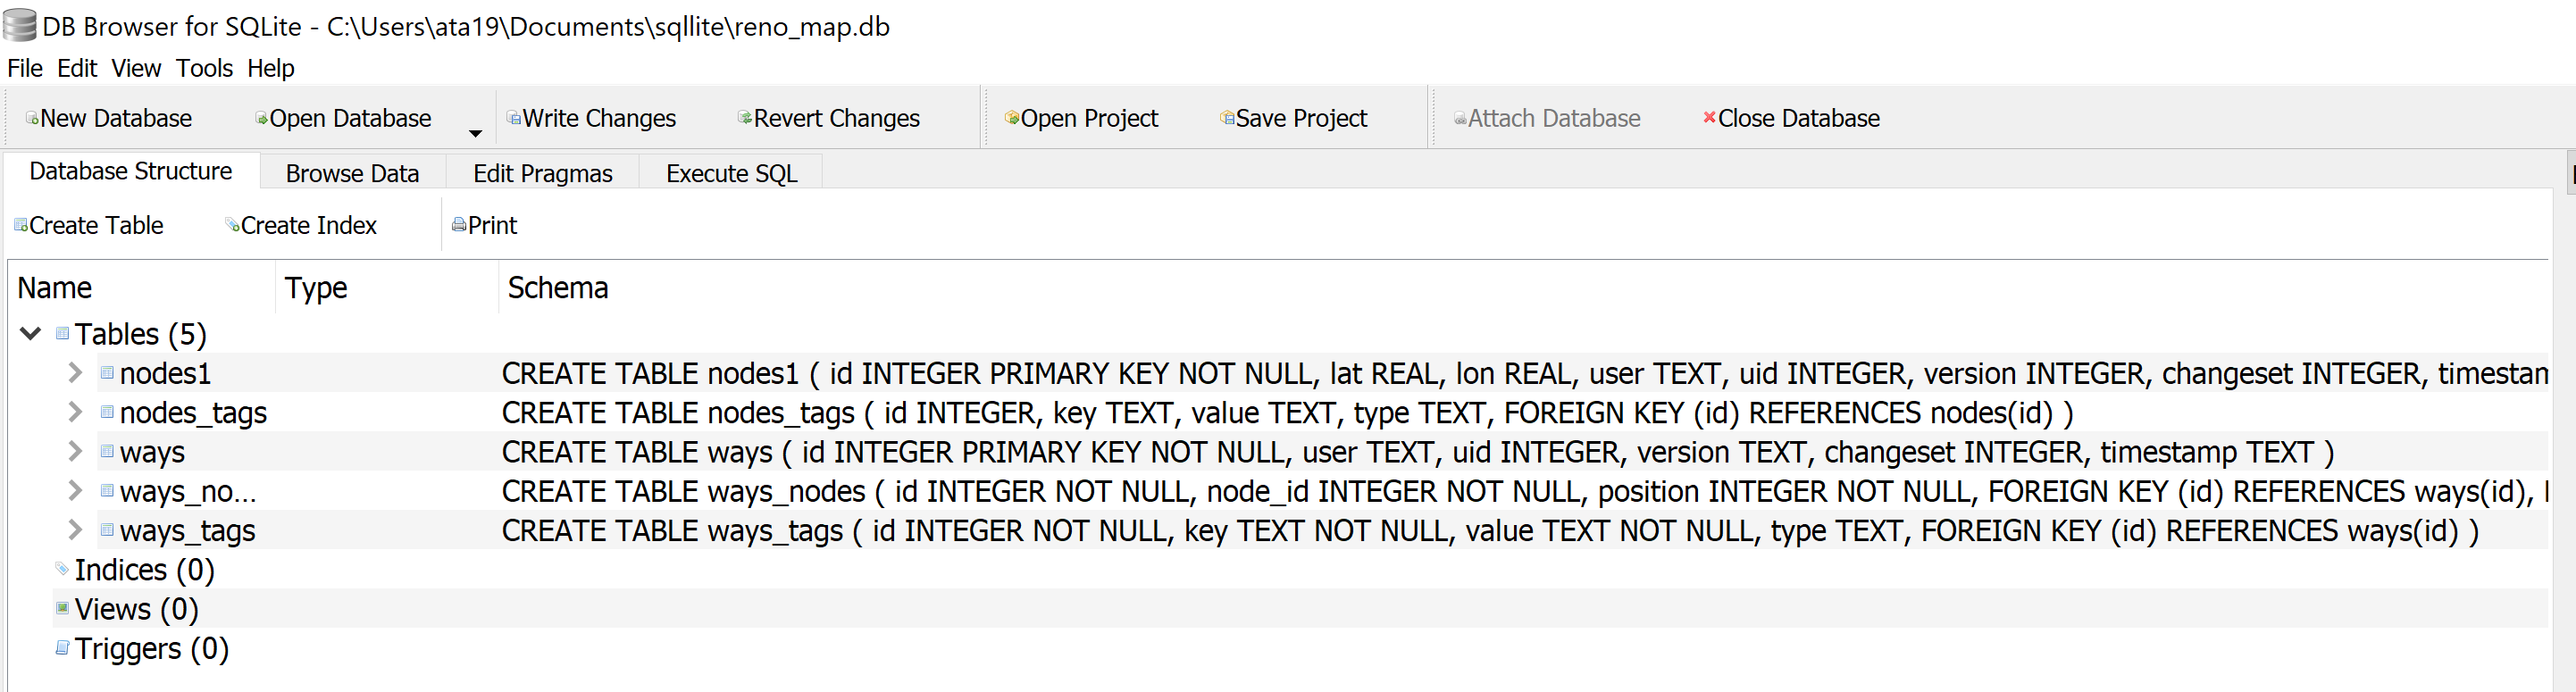

<p> For our first query, lets see how many users we have in our nodes1 table. </p>

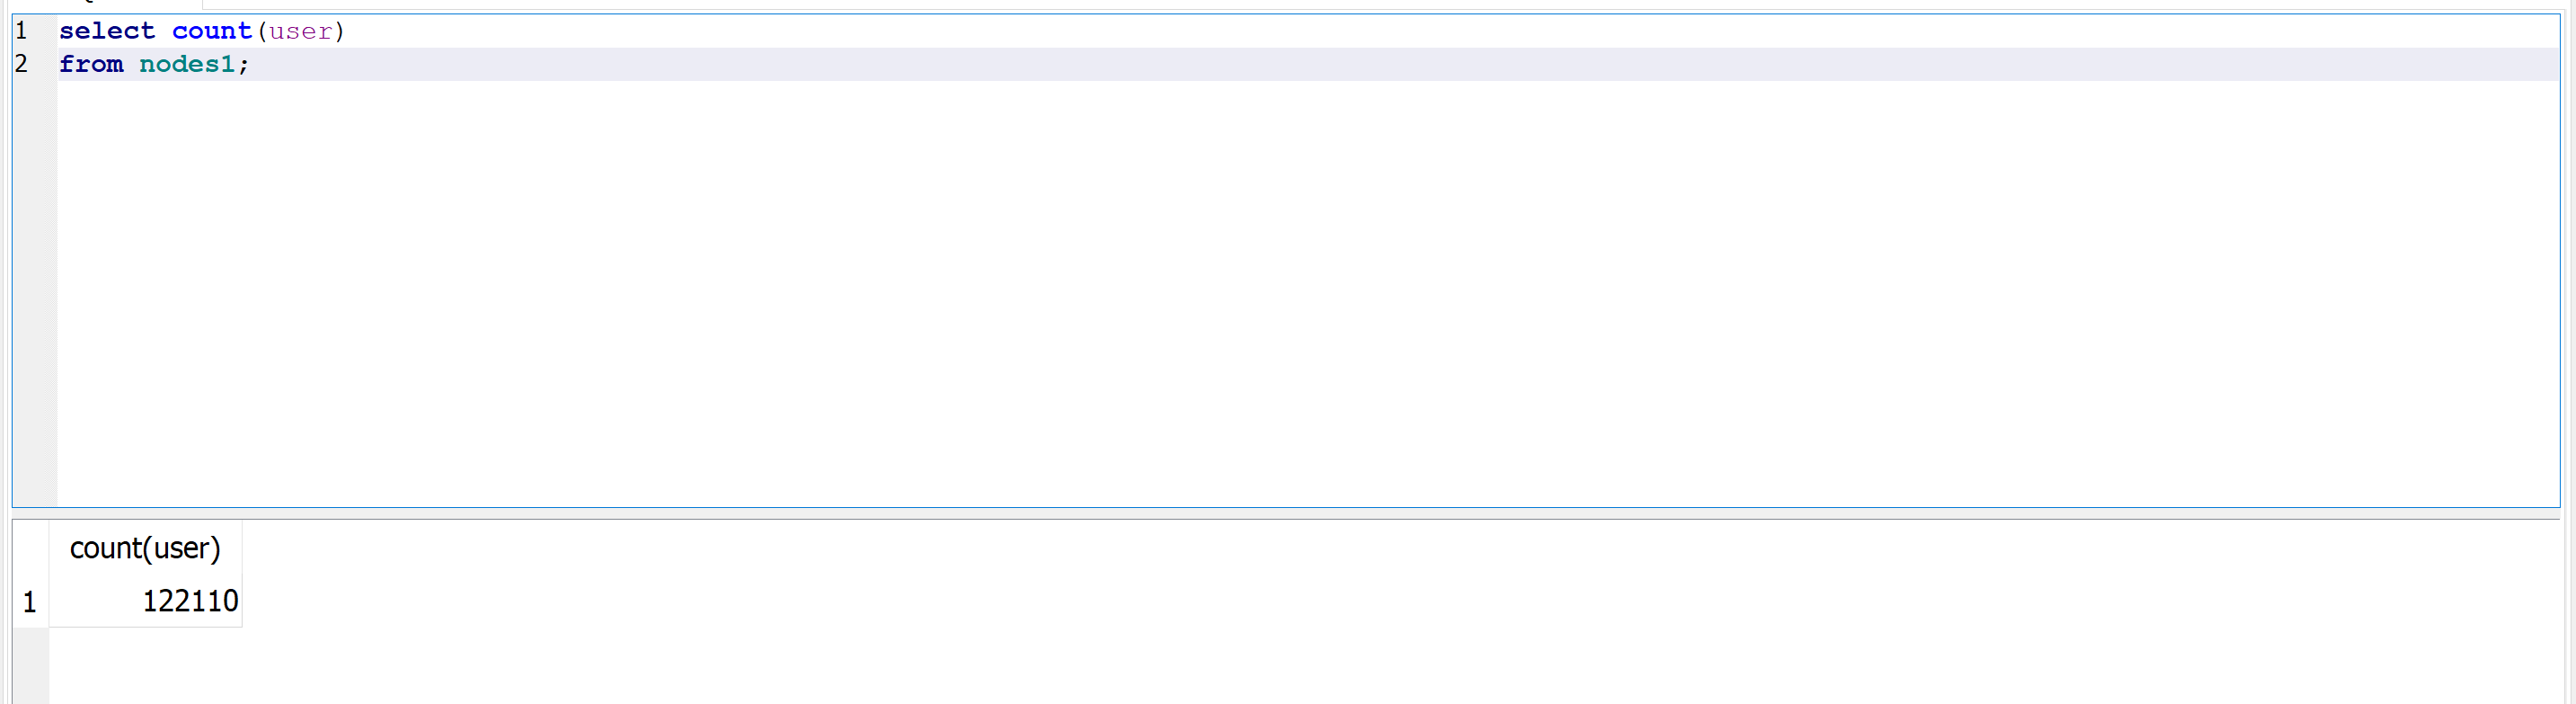

<p/> Whoa thats a lot of users! Lets see how many we have in our ways table, but without counting duplicate names.</p>

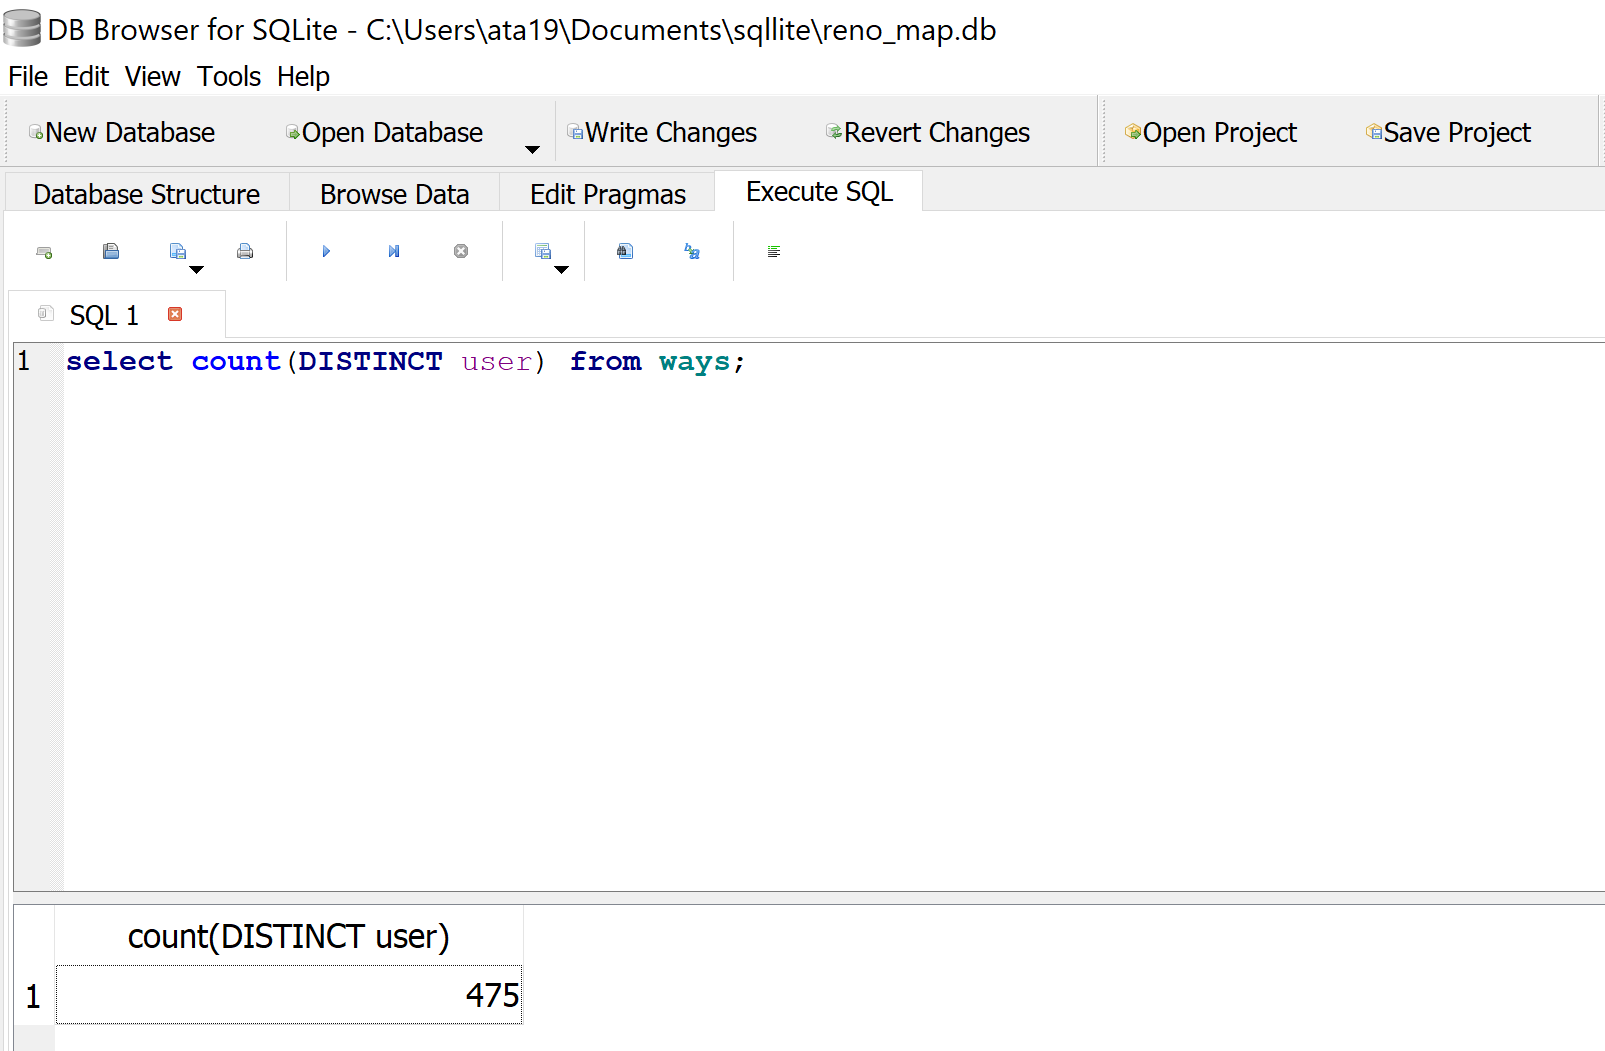